# __Main Code__

In [31]:
import pandas as pd

In [41]:
# Richard Tobing 862219395


# Task List:
    # [x] Misplaced Tiles heuristic: number of misplaced tiles
    # [x] Manhattan heuristic: the number of moves each misplaced tile needs to take to get to the correct placement
    # [x]  MAKE-QUEUE: takes in the initial state, and returnsn the frontier
        # [x] simple movement 
        # [x] corners 
        # [x] sides and center
    # [x] Misplaced queueing function at depth <=8
    # [x] Mahtattan queueing function
    # [x] UCS queueing function
    # [x] REMOVE_FRONT(nodes): chooses one node from the frontier to process
    # [x] Uniform Cost Search: essentially equivalent to BFS since all moves only cost 1, basically a move counter
    # [x] skip repeated states

    # [x] main() functio with user input
        # [x] traceback printing

    # [x] Stats
        #[x] Depth vs expanded nodes comparison
        #[x] max q size comparison

    # [] Problem obj: has OPERATORS, GOAL_TEST(), and INITIAL_STATE as fields
    # [x] Report
        #[] easy sample trace
        #[] easy hard trace


    #[x] optimize expandNode
    #[x] add good comments
    #[x] Refactor code to make it look more like the psudocode in teh slides
    #[] find brown m&ms
    #[] develop Artificial General intelligence and vanquish your enemies


# -----these are sample problems taken from Dr. Keogh's slides/prompt:-----
sample=    [[3,2,8],
            [4,5,6],
            [7,1,0]]
mySample=  [[6,6,6],
            [6,6,6],
            [6,6,0]]
sampleD4=  [[1,2,3],
            [5,0,6],
            [4,7,8]]
sample2=   [[1,2,3],
            [4,5,8],
            [6,7,0]]
sampleD2=  [[1,2,3],
            [4,5,6],
            [0,7,8]]
sampleD0=  [[1,2,3],
            [4,5,6],
            [7,8,0]]
sampleD8=  [[1,3,6],
            [5,0,2],
            [4,7,8]]
sampleD12=  [[1,3,6],
             [5,0,7],
             [4,8,2]]
sampleD16=  [[1,6,7],
             [5,0,3],
             [4,8,2]]
sampleD20=  [[7,1,2],
             [4,8,5],
             [6,3,0]]
sampleD24=  [[0,7,2],
             [4,6,1],
             [3,5,8]]
sampleD31=  [[8,6,7],
             [2,5,4],
             [3,0,1]]
#-----------------------------------------------------------------///
            
#----problem proto-Object-------
initState= sampleD2
dim= len(initState[0])
squize= dim*dim
#----------------------------

def printNode(matrix):
    for row in matrix:
        print(row)
    print("---------\n")

#[+]-- Executes the operations that are defined in expandNode(), --
def operation(node,y,x,yShift,xShift):
    repeat= False
    swap= node[y+yShift][x+xShift]
    node[y+yShift][x+xShift]= 0
    node[y][x]= swap
    return node, repeat

#[+]-- Takes the positio of the zero and defines the operations (shift left, right, top etc) for generating new nodes ---
def expandNode(matrix, zeroPos):
    frontier= []
    y= zeroPos[0]
    x=zeroPos[1]
    node1 = [row[:] for row in matrix]
    node2 = [row[:] for row in matrix]
    if y==0:
        #[x]--top left--
        if x==0:
            # shift down
            node1 = (operation(node1,y,x,1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            # shift right
            node2 = (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
        #[x] --top right--
        elif x==(dim-1):
            #shift down
            node1 = (operation(node1,y,x,1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            #shift left
            node2 = (operation(node2,y,x,0,-1))
            if node2[1]==False:
                frontier.append(node2[0])
        # [x] --top side--
        else:
            node3= [row[:] for row in matrix]
            #shift down
            node1= (operation(node1,y,x,1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
            #shift left
            node3= (operation(node3,y,x,0,-1))
            if node3[1]==False:
                frontier.append(node3[0])
    elif y== (dim-1):
        #[x]--bottom right-- 
        if x== (dim-1):
            #shift left
            node1= (operation(node1,y,x,0,-1))
            if node1[1]==False:
                frontier.append(node1[0])

            #shift up
            node2= (operation(node2,y,x,-1,0))
            if node2[1]==False:
                frontier.append(node2[0])
        #[x]--botom left--
        elif x== 0:
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])

            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
        # [x] --bottom side--
        else:
            node3= [row[:] for row in matrix]
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
            #shift left
            node3= (operation(node3,y,x,0,-1))
            if node3[1]==False:
                frontier.append(node3[0])
    else:
        #[x]--left side--
        node3= [row[:] for row in matrix]
        if x==0:
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])
                
            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])

            #shift down
            node3= (operation(node3,y,x,1,0))
            if node3[1]==False:
                frontier.append(node3[0])
        #[x] --right side--
        elif x == (dim-1):
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            #shift left
            node2= (operation(node2,y,x,0,-1))
            if node2[1]==False:
                frontier.append(node2[0])
            #shift down
            node3= (operation(node3,y,x,1,0))
            if node3[1]==False:
                frontier.append(node3[0])

        # --center region--
        else:
            node4= [row[:] for row in matrix]
            # shift up
            node1 = (operation(node1,y,x,-1,0))
            if (node1[1])==False:
                frontier.append(node1[0])
            #shift left
            node2 = (operation(node2,y,x,0,-1))
            if (node2[1])==False: 
                frontier.append(node2[0])
            #shift down
            node3 = (operation(node3,y,x,1,0))
            if (node3[1])==False: 
                frontier.append(node3[0])
            # shift right
            node4 = (operation(node4,y,x,0,1))
            if (node4[1])==False: 
                frontier.append(node4[0])
    return frontier

#[+]-- Adds new nodes generated by operations() to the queue ---
def makeNewQueue(node,newNodes, zeroPos):
    newFrontier= expandNode(node, zeroPos)
    newNodes+= [row[:] for row in newFrontier]
    #newNodes+= [(idx,row[:]) for row in newFrontier]
    return newNodes

def makeQueue(queueFunction, minima, newNodes, nodes, zeros, g, d, traceBack):
    if queueFunction!=0:
        mindex= min(minima, key=minima.get)
        for key in minima:
            if key != mindex:
                newNodes.append(nodes[key])
        newNodes= makeNewQueue(nodes[mindex], newNodes, zeros[mindex])
        traceBack.append(nodes[mindex])
        print("The best state to expand with h(n)= " +str(minima[mindex]-g+1) + " and g(n)= " + str(g-1))
        printNode(traceBack[d-1])
    nodes= []
    [nodes.append(x) for x in newNodes if x not in traceBack]
    return nodes



#[+] -- This function simultaneusly finds the Manhattan distance, Misplaced tiles, and the blank space for each node --
def heuristic(matrix):
    misplaced, lindex, manhattan= 0,0,0
    isGoal= False
    zeroPos= (-1,-1)
    for y in range(dim):
        for x in range(dim):
            i = matrix[y][x]
            pos= (y,x)
            lindex+= 1
            if lindex != i:
                misplaced+= 1
                if i!=0:
                    dif= abs(i - lindex)
                    manhattan+= (dif//dim) + (dif%dim)
            if i == 0:
                zeroPos= pos
    misplaced-= 1
    if misplaced == 0:
        isGoal= True
    return misplaced, manhattan, zeroPos, isGoal

def empty(size):
    if size==0: 
        return True


#[:+:]---------------------This is the main driver function---------------------------------[:+:]
def generalSearch(initialState,queueFunction):
    finalState= False
    g,d, maxQ_size= 0,0,0
    nodes= []
    traceBack= []
    nodes.append(initialState)
    
    while finalState==False:
        newNodes= []
        zeros= []
        minima= {}
        size= len(nodes)

        if empty(size):
            return "failure - empty nodes"
            
        if size>maxQ_size:
            maxQ_size= size

        #[:+:]----------------Main Loop------------------------[:+:]
        for node in nodes:
            # --- For each node, the heuristic() function finds the position of zero, test for goal state, and finds both heuristics simultaneiously
           #----------------------#
            idx= nodes.index(node)
            h= heuristic(node)
            misplaced= h[0]
            manhattan= h[1]
            zeroPos= h[2]
            goaltest= h[3]
            #--------------------#

            #---this is the goal test--------#
            if goaltest== True: 
                finalState = True
                print("Final State Reached | "  + "Nodes Expanded: " + str(g) + " |  Depth of Solution: " + str(d) + " | max Queue size: "+ str(maxQ_size) )
                printNode(node)
                return g, node, maxQ_size

            # -- If we use uniform cost search, then every node will be expanded as we loop through the queue..-----#
            if queueFunction==0:
                newNodes= makeNewQueue(node, newNodes, zeroPos)
                traceBack.append(node)
                g+=1

            # -- ..Alternatively, if we use A*, instead of expanding the node, we store its its f() value in a dictionary, so we can find the minimum later---#
            elif queueFunction==1: 
                minima[idx]= misplaced + g
                zeros.append(zeroPos)

            # -- Here, we store the manhattan distance of the current node in a dictionary so we can find the minimum value later
            elif queueFunction==2:
                minima[idx]= manhattan + g
                zeros.append(zeroPos)
        #[:+:]--------------------------/Main Loop--------------------------[:+:]
        d+=1
    
       
        if queueFunction !=0:
            g+=1

         # -- Here, we find the minimum f() for A* algorithm and expand the corresponding node, which will be replaced by its children in the queue -- #
        nodes= makeQueue(queueFunction, minima, newNodes, nodes, zeros, g, d, traceBack)


    return "failure"   


    
    
#---------------------------------------




#-------------The main function, used for getting user input, taken from the example given in Dr. Keogh's prompt------------------------------------#
def main():
    puzzle_mode = input("Welcome to an 8-Puzzle Solver. Type '1' to use a default puzzle, or '2' to create your own."+ '\n')
    if puzzle_mode == "1":
        select_and_init_algorithm(init_default_puzzle_mode())
    elif puzzle_mode == "2":
        print("Enter your puzzle, using a zero to represent the blank. " +
                "Please only enter valid 8-puzzles. Enter the puzzle demilimiting " +
                "the numbers with a space. RET only when finished." + '\n')
        puzzleInput0= input("Enter the first row: ")
        puzzleInput1= input("Enter the second row: ")
        puzzleInput2= input("Enter the third row: ")
        puzzle_row_one = puzzleInput0.split()
        puzzle_row_two = puzzleInput1.split()
        puzzle_row_three = puzzleInput2.split()
        for i in range(0, 3):
            puzzle_row_one[i] = int(puzzle_row_one[i])
            puzzle_row_two[i] = int(puzzle_row_two[i])
            puzzle_row_three[i] = int(puzzle_row_three[i])
            user_puzzle = [puzzle_row_one, puzzle_row_two, puzzle_row_three]
        select_and_init_algorithm(user_puzzle)
    return
def init_default_puzzle_mode():
    selected_difficulty = input("You wish to use a default puzzle. Please enter a desired difficulty on a scale from 0 to 5." + '\n')
    if selected_difficulty == "0":
        print("Difficulty of 'Trivial' selected.")
        return sampleD2
    if selected_difficulty == "1":
        print("Difficulty of 'Very Easy' selected.")
        return sampleD4
    if selected_difficulty == "2":
        print("Difficulty of 'Easy' selected.")
        return sampleD8
    if selected_difficulty == "3":
        print("Difficulty of 'Doable' selected.")
        return sampleD12
    if selected_difficulty == "4":
        print("Difficulty of 'Oh Boy' selected.")
        return sampleD16
    if selected_difficulty == "5":
        print("Difficulty of 'Impossible' selected.")
        return sampleD20
def select_and_init_algorithm(puzzle):
    algorithm = input("Select algorithm. (0) for Uniform Cost Search, (1) for the Misplaced Tile Heuristic, " "or (2) the Manhattan Distance Heuristic." + '\n')
    generalSearch(puzzle, int(algorithm))

# -- [+] Run these to run the algorithm directly without playing the game: 
# generalSearch(sampleD31, 2)
# generalSearch(sampleD31, 1)
# generalSearch(sampleD16, 0)

main()

The best state to expand with h(n)= 17 and g(n)= 0
[8, 6, 7]
[2, 5, 4]
[3, 0, 1]
---------

The best state to expand with h(n)= 16 and g(n)= 1
[8, 6, 7]
[2, 5, 4]
[3, 1, 0]
---------

The best state to expand with h(n)= 17 and g(n)= 2
[8, 6, 7]
[2, 5, 0]
[3, 1, 4]
---------

The best state to expand with h(n)= 16 and g(n)= 3
[8, 6, 0]
[2, 5, 7]
[3, 1, 4]
---------

The best state to expand with h(n)= 15 and g(n)= 4
[8, 0, 6]
[2, 5, 7]
[3, 1, 4]
---------

The best state to expand with h(n)= 14 and g(n)= 5
[0, 8, 6]
[2, 5, 7]
[3, 1, 4]
---------

The best state to expand with h(n)= 13 and g(n)= 6
[2, 8, 6]
[0, 5, 7]
[3, 1, 4]
---------

The best state to expand with h(n)= 12 and g(n)= 7
[2, 8, 6]
[3, 5, 7]
[0, 1, 4]
---------

The best state to expand with h(n)= 11 and g(n)= 8
[2, 8, 6]
[3, 5, 7]
[1, 0, 4]
---------

The best state to expand with h(n)= 10 and g(n)= 9
[2, 8, 6]
[3, 5, 7]
[1, 4, 0]
---------

The best state to expand with h(n)= 11 and g(n)= 10
[2, 8, 6]
[3, 5, 0]
[1, 4, 7

(100, [[1, 2, 3], [4, 5, 6], [7, 8, 0]], 65)

# __Code For Test Cases / Data:__

Final State Reached | Nodes Expanded: 0 |  Depth of Solution: 0 | max Queue size: 1
The best state to expand with h(n)= 2 and g(n)= 0
[1, 2, 3]
[4, 5, 6]
[0, 7, 8]
---------

The best state to expand with h(n)= 1 and g(n)= 1
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]
---------

Final State Reached | Nodes Expanded: 2 |  Depth of Solution: 2 | max Queue size: 3
The best state to expand with h(n)= 4 and g(n)= 0
[1, 2, 3]
[5, 0, 6]
[4, 7, 8]
---------

The best state to expand with h(n)= 3 and g(n)= 1
[1, 2, 3]
[0, 5, 6]
[4, 7, 8]
---------

The best state to expand with h(n)= 2 and g(n)= 2
[1, 2, 3]
[4, 5, 6]
[0, 7, 8]
---------

The best state to expand with h(n)= 1 and g(n)= 3
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]
---------

Final State Reached | Nodes Expanded: 4 |  Depth of Solution: 4 | max Queue size: 6
The best state to expand with h(n)= 8 and g(n)= 0
[1, 3, 6]
[5, 0, 2]
[4, 7, 8]
---------

The best state to expand with h(n)= 7 and g(n)= 1
[1, 3, 6]
[0, 5, 2]
[4, 7, 8]
---------

The best state to ex

Text(0, 0.5, 'Max Queue')

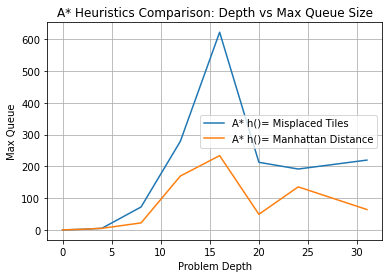

In [ ]:
aStarMH,aStarMP, ucs= [], [], []
aStarMH.append(generalSearch(sampleD0,2)[2])
aStarMH.append(generalSearch(sampleD2,2)[2])
aStarMH.append(generalSearch(sampleD4,2)[2])
aStarMH.append(generalSearch(sampleD8,2)[2])
aStarMH.append(generalSearch(sampleD12,2)[2])
aStarMH.append(generalSearch(sampleD16,2)[2])
aStarMH.append(generalSearch(sampleD20,2)[2])
aStarMH.append(generalSearch(sampleD24,2)[2])
aStarMH.append(generalSearch(sampleD31,2)[2])
aStarMP.append(generalSearch(sampleD0,1)[2])
aStarMP.append(generalSearch(sampleD2,1)[2])
aStarMP.append(generalSearch(sampleD4,1)[2])
aStarMP.append(generalSearch(sampleD8,1)[2])
aStarMP.append(generalSearch(sampleD12,1)[2])
aStarMP.append(generalSearch(sampleD16,1)[2])
aStarMP.append(generalSearch(sampleD20,1)[2])
aStarMP.append(generalSearch(sampleD24,1)[2])
aStarMP.append(generalSearch(sampleD31,1)[2])



# ucs.append(generalSearch(sampleD0,0)[0])
# ucs.append(generalSearch(sampleD2,0)[0])
# ucs.append(generalSearch(sampleD4,0)[0])
# ucs.append(generalSearch(sampleD8,0)[0])
# ucs.append(generalSearch(sampleD12,0)[0])
# ucs.append(generalSearch(sampleD16,0)[0])
# ucs.append(generalSearch(sampleD20,0)[0])



aStar_df = pd.DataFrame({
   #    'Uniform Cost Search':        [    ucs[0] ,     ucs[1] ,      ucs[2] ,      ucs[3] ,        ucs[4],        ucs[5],      ucs[6]     ] ,
   'A* h()= Misplaced Tiles':    [aStarMP[0], aStarMP[1], aStarMP[2], aStarMP[3], aStarMP[4], aStarMP[5],  aStarMP[6],   aStarMP[7], aStarMP[8] ],
   'A* h()= Manhattan Distance': [aStarMH[0], aStarMH[1], aStarMH[2], aStarMH[3], aStarMH[4], aStarMH[5],  aStarMH[6],   aStarMH[7], aStarMH[8] ],
   }, index=                     [0,          2,          4,          8,          12,         16,              20,       24,         31         ]
   )
aStarGraph = aStar_df.plot.line(title= "A* Heuristics Comparison: Depth vs Max Queue Size", grid= True)
aStarGraph.set_xlabel("Problem Depth")
aStarGraph.set_ylabel("Max Queue")